# TRABAJO Parte 2: AIA_2022-2023

# Transfer Learning con CNNs - Dataset: Flowers

La idea de este trabajo es familiarizarnos con dos situaciones muy habituales en la actividad real de un "Machine Learning Engineer":

1.   En primer lugar, con una de las técnicas más potentes asociadas con las redes neuronales: el **Transfer Learning**. Dado que las redes neuronales, para resolver un problema, capturan en su estructura de capas y pesos una representación jerárquica del problema.
Entonces..., ¿por qué no aprovechar ese conocimiento obtenido, para resolver otro problema diferente?

2.  En segundo lugar, con la **busqueda de información sobre conceptos nuevos**. En este caso, los dos primeros modelos a implementar los hemos trabajado en clase. No así el Transfer Learning, y por tanto, deberéis buscar vosotros mismos cómo hacer lo que se pide para el Modelo 3. Consultar en blogs, web y tutoriales es algo común en el día a día de alguien que quiere profundizar en el ML y, para ello, existen infinidad de fuentes. A modo de ejemplo, una fuente para profundizar en el Transfer Learning con redes convolucionales es: https://www.learndatasci.com/tutorials/hands-on-transfer-learning-keras/

En este trabajo vamos intentar resolver un problema de clasificación sobre un dataset propuesto por Tensorflow en 2019 conocido como "flowers". Este conjunto está formado por 3670 imágenes de flores pertenecientes a 5 clases diferentes. Para ello implementaremos 3 modelos:

*   Modelo 1: implementación de una CNN básica.
*   Modelo 2: es una evolución del modelo anterior, aplicando técnicas que reduzcan el overfitting.
*   Modelo 3: rompemos la barrera de tener que seguir complicando nuestro modelo y se pide aplicar transfer learning utilizando un pre-trained model.





# a) Carga de datos

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd

import pathlib
import os
import glob
import shutil
tf.__version__

'2.12.0'

Descargamos el dataset que pone a nuestra disposición Tensorflow.

In [ ]:
_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

zip_file = tf.keras.utils.get_file(origin=_URL,
                                   fname="flower_photos.tgz",
                                   extract=True)

base_dir = os.path.join(os.path.dirname(zip_file), 'flower_photos')

228813984/228813984 [==============================] - 2s 0us/step


Tras completar la descarga, debemos tener la siguiente estructura de directorios:

<pre style="font-size: 10.0pt; font-family: Arial; line-height: 2; letter-spacing: 1.0pt;" >
<b>flower_photos</b>
|__ <b>daisy</b>
|__ <b>dandelion</b>
|__ <b>roses</b>
|__ <b>sunflowers</b>
|__ <b>tulips</b>
</pre>

Desgraciadamente, para este dataset, Tensorflow no nos proporciona la estructura de directorios necesaria de train y de validación. Por lo que debemos proceder del siguiente modo:

* Crear una carpeta `train` y de `val`, cada una de ellas debe contener a su vez, cinco subdirectorios: uno para cada clase de flor.
* Moveremos las imágenes de las carpetas originales a estas nuevas carpetas. De modo que el 80% de las imágenes vayan al conjunto de train y el 20% restante al de validación.
* La estructura final de directorios debe ser la siguiente:

<pre style="font-size: 10.0pt; font-family: Arial; line-height: 2; letter-spacing: 1.0pt;" >
<b>flower_photos</b>
|__ <b>train</b>
    |______ <b>daisy</b>: [12.jpg, 28.jpg, 31.jpg ....]
    |______ <b>dandelion</b>: [41.jpg, 22.jpg, 35.jpg ....]
    |______ <b>roses</b>: [121.jpg, 92.jpg, 38.jpg ....]
    |______ <b>sunflowers</b>: [93.jpg, 23.jpg, 83.jpg ....]
    |______ <b>tulips</b>: [109.jpg, 267.jpg, 93.jpg ....]
 |__ <b>val</b>
    |______ <b>daisy</b>: [507.jpg, 508.jpg, 509.jpg ....]
    |______ <b>dandelion</b>: [719.jpg, 720.jpg, 721.jpg ....]
    |______ <b>roses</b>: [514.jpg, 515.jpg, 516.jpg ....]
    |______ <b>sunflowers</b>: [560.jpg, 561.jpg, 562.jpg .....]
    |______ <b>tulips</b>: [640.jpg, 641.jpg, 642.jpg ....]
</pre>

Creamos una lista con el nombre de las 5 clases. En castellano sería: margaritas, diente de león, rosas, girasoles y tulipanes.

In [ ]:
classes = ['roses', 'daisy', 'dandelion', 'sunflowers', 'tulips']

Creemos la estructura de directorios necesaria:

In [ ]:
SPLIT_RATIO=0.8

for cl in classes:
    # path de las imagenes de la clase cl
    img_path = os.path.join(base_dir, cl)

    # obtenemos la lista de todas las imagenes
    images = glob.glob(img_path + '/*.jpg')
    print("{}: {} Imagenes".format(cl, len(images)))

    # determinamos cuantas imagenes son el 80%
    num_train = int(round(len(images)*SPLIT_RATIO))

    # separamos las imagenes en dos listas
    train, val = images[:num_train], images[num_train:]

    # creamos la carpeta de train/clase y val/clase
    if not os.path.exists(os.path.join(base_dir, 'train', cl)):
            os.makedirs(os.path.join(base_dir, 'train', cl))
    if not os.path.exists(os.path.join(base_dir, 'val', cl)):
            os.makedirs(os.path.join(base_dir, 'val', cl))

    # movemos las imagenes
    for t in train:
        shutil.move(t, os.path.join(base_dir, 'train', cl))
    for v in val:
        shutil.move(v, os.path.join(base_dir, 'val', cl))

roses: 641 Imagenes
daisy: 633 Imagenes
dandelion: 898 Imagenes
sunflowers: 699 Imagenes
tulips: 799 Imagenes


Preparamos variables con las rutas de los diferentes directorios:

In [ ]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

daisy_dir = os.path.join(train_dir, 'daisy')
dandelion_dir = os.path.join(train_dir, 'dandelion')
roses_dir = os.path.join(train_dir, 'roses')
sunflowers_dir = os.path.join(train_dir, 'sunflowers')
tulips_dir = os.path.join(train_dir, 'tulips')

Muestre el nombre de dos ficheros cualquiera en alguna de esas rutas:

In [ ]:
print(os.listdir(daisy_dir)[:2])

['2579018590_74359dcf1a_m.jpg', '8071646795_2fdc89ab7a_n.jpg']


Es decir, la clase a la que pertenece cada imagen no viene dada por el nombre del fichero sino por el directorio en el que se encuentra almacenada.

Muestra el número de imágenes de train que tenemos de cada clase:

In [ ]:
clases = [daisy_dir, dandelion_dir, roses_dir, sunflowers_dir, tulips_dir]

for clase in clases:
  n = len(os.listdir(clase))
  print(f"Número de imagenes de train de {clase}: {n}")

Número de imagenes de train de /root/.keras/datasets/flower_photos/train/daisy: 506
Número de imagenes de train de /root/.keras/datasets/flower_photos/train/dandelion: 718
Número de imagenes de train de /root/.keras/datasets/flower_photos/train/roses: 513
Número de imagenes de train de /root/.keras/datasets/flower_photos/train/sunflowers: 559
Número de imagenes de train de /root/.keras/datasets/flower_photos/train/tulips: 639


# b) Visualización del dataset

Muestra 3 imágenes de cada una de las clases, utilizando como título de la imagen, el shape del array de numpy asociado a cada imagen. Comprueba que las imágenes tienen diferentes shapes, por lo que más adelante tendremos que unificar su tamaño.

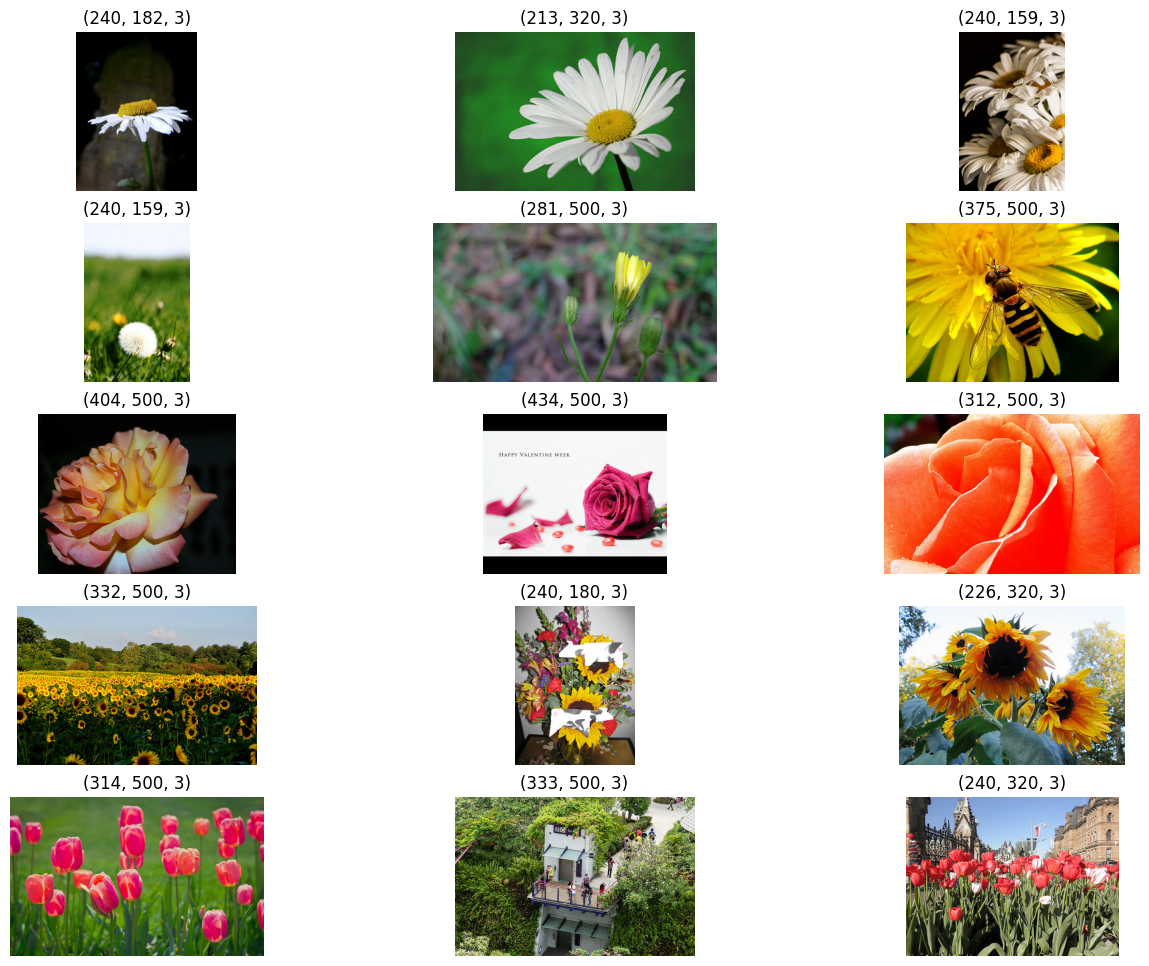

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(16,12))
for i,clase in enumerate(clases):
  for j,img in enumerate(os.listdir(clase)[:3]):
    img_path = os.path.join(clase, img)
    sp = plt.subplot(5, 3, i * 3 + j + 1)
    sp.axis('Off')
    img = mpimg.imread(img_path)
    plt.title(img.shape)
    plt.imshow(img)



# c) Modelo 1: CNN básica (objetivo: accuracy_valid > 60%)


Implemente una red convolucional para resolver el problema de clasificación. Para ello se sugiere una CNN con 3 capas convolucionales + pooling con la siguiente estructura:

Bloque de procesamiento de imagen:
1.   32 kernels -> 64 kernels -> 96 kernels
2.   kernels de 3x3.
3.   Stride = 1 y padding = SI.
4.   Función de activación ReLU.
5.   Maxpooling de 2x2 con stride clásico de 2 pixeles.
6.   Igualamos el tamaño de todas las imágenes a 150 x 150.

Bloque de decisión:
7.   Capa densa de 512 neuronas.
8.   Capa densa de salida.

**Entrene un modelo con la estructura anterior de manera que obtenga un accuracy (sobre el conjunto de validación) > 60%.** Utilice el optimizador que considere más adecuado.

Sugerencias:
*   Recuerda que si no se realiza conversión a One-Hot de la etiqueta a predecir, debes utilizar como función de error `SparseCategoricalCrossentropy` (este es el procedimiento que hemos usado en clase).
*   Considera un learning rate en el entorno de 0.001.
*   En el caso de los generators utiliza `class_mode='sparse'`.
*   Puedes utilizar p.e. un `batch_size = 100`.




In [ ]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(filters = 32, kernel_size = (3,3), input_shape=(150,150,3), padding = 'same',
                              activation = 'relu', name = 'Conv1'))
model.add(keras.layers.MaxPooling2D(strides=(2,2)))

model.add(keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'relu', name = 'Conv2'))
model.add(keras.layers.MaxPooling2D(strides=(2,2)))

model.add(keras.layers.Conv2D(filters = 96, kernel_size = (3,3), padding = 'same', activation = 'relu', name = 'Conv3'))
model.add(keras.layers.MaxPooling2D(strides=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(units=512, activation='relu'))
model.add(keras.layers.Dense(units=5, activation='softmax'))

Indica cual es el shape de la imagen antes y después de cada capa de la red. **Explica cómo has obtenido dichos valores**. Compara el resultado con un summary() del modelo

|Capa| Shape a la salida| #parámetros |
|:-|:-:|:-:|
|Conv_1|(150,150,32)|896
|Pool_1|(75,75,32)|0
|Conv_2|(75,75,64)|18496
|Pool_2|(37,37,64)|0
|Conv_3|(37,37,96)|55392
|Pool_3|(18,18,96)|0
|flatten|31104|0
|densa_1|512|15925760
|densa_2|5|2565

Para calcular el numero de parámetros de capas densas he empleado la fórmula:
Número de parámetros =  (número de neuronas en la capa anterior) * (número de neuronas en la capa actual) + (número de neuronas en la capa actual)

En las capas Conv2D: (Tamaño del kernel * número de canales de entrada + 1) * número de filtrod

Como vimos en teoría las capas de Flatten y Pooling no tienen parámetros.

Por otra parte, para el cálculo de la dimensión, como en las capas convolucionales tenemos padding = SI y strides = 1 se mantiene el tamaño de la imagen en altura y anchura y solo varía el número de canales, en función del número de filtros que lleve la capa.

Las capas de Pooling del modo que están puestas reducen la dimension de la imagen a la mitad.

La dimensión de salida de la capa de Flatten es la multiplicación de las 3 componentes que recibe (Altura * anchura * numero de canales)

Por útlimo la dimensión de salida de la capa densa viene dada por el número de neuronas que configuremos.



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1 (Conv2D)              (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 Conv2 (Conv2D)              (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 Conv3 (Conv2D)              (None, 37, 37, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 96)       0

Muestra la evolución de la función de error (train y valid) durante el entrenamiento.__Explica qué problema presenta el modelo que hemos entrenado.__

In [ ]:
optim = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optim,
              metrics=['acc'])

Reescalamos las imagenes con los generadores.

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size=100,
                                                    class_mode='sparse')
validation_generator = val_datagen.flow_from_directory(val_dir,
                                                    target_size=(150,150),
                                                    batch_size=100,
                                                    class_mode='sparse')

Found 2935 images belonging to 5 classes.
Found 735 images belonging to 5 classes.


In [ ]:
history = model.fit(train_generator, epochs=20, validation_data=validation_generator)

Epoch 1/20
30/30 [==============================] - 26s 454ms/step - loss: 1.5661 - acc: 0.3622 - val_loss: 1.1378 - val_acc: 0.5116
Epoch 2/20
30/30 [==============================] - 16s 530ms/step - loss: 1.0881 - acc: 0.5550 - val_loss: 1.0445 - val_acc: 0.6054
Epoch 3/20
30/30 [==============================] - 13s 437ms/step - loss: 0.9189 - acc: 0.6395 - val_loss: 0.9595 - val_acc: 0.6150
Epoch 4/20
30/30 [==============================] - 14s 471ms/step - loss: 0.8131 - acc: 0.6831 - val_loss: 0.9639 - val_acc: 0.6340
Epoch 5/20
30/30 [==============================] - 13s 437ms/step - loss: 0.6963 - acc: 0.7397 - val_loss: 0.9236 - val_acc: 0.6449
Epoch 6/20
30/30 [==============================] - 14s 447ms/step - loss: 0.5626 - acc: 0.7925 - val_loss: 0.9185 - val_acc: 0.6707
Epoch 7/20
30/30 [==============================] - 13s 435ms/step - loss: 0.4298 - acc: 0.8440 - val_loss: 0.9838 - val_acc: 0.6707
Epoch 8/20
30/30 [==============================] - 13s 433ms/step - 

Vamos a observarlo gráficamente:

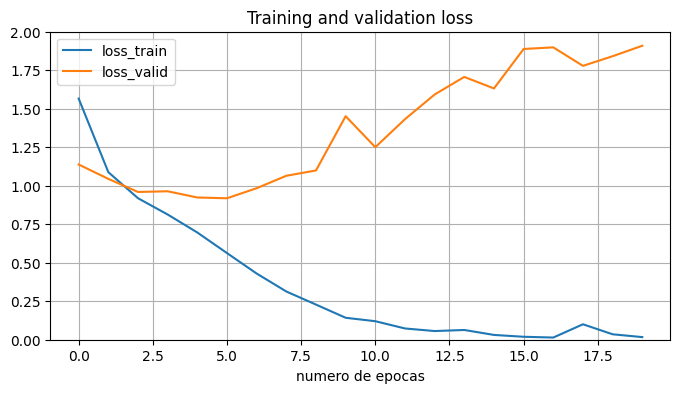

In [ ]:
import pandas as pd

pd.DataFrame({'loss_train': history.history['loss'],
              'loss_valid': history.history['val_loss']}).plot(figsize=(8,4))

plt.grid(True)
plt.ylim(0,2)
plt.xlabel('numero de epocas')
plt.title('Training and validation loss');

Como podemos ver en el gráfico claramente se produce un gran sobreajuste en el modelo.
Para eliminar este problema emplearemos a continuación técnicas de reducción del sobreajuste.

# d) Modelo 2: reducción del overfitting (objetivo: accuracy_valid > 70%)

Introduzca en el modelo anterior las dos técnicas más habituales de reducción del overfitting:

    * drop-out
    * data augmentation

El objetivo es alcanzar un **objetivo es conseguir un accuracy sobre el conjunto de validacion > 70%.**

**Explica en qué consisten y qué utilidad tienen para nuestro problema**

1. Data Augmentation consiste en, a partir del conjunto original de train, construir un nuevo conjunto más extenso por medio de aplicar transformaciones sobre los datos originales. Con esto evitamos en parte que el modelo se sobreajuste al conjunto de train.

2. Drop-out consiste en apagar un cierto numero de neuronas en la capa en la que se utilice. Este número viene dado por el drop_rate que suele ser de entorno al 50% en CNNs y este parámetro expresa la probabilidad de una neurona de apagarse o no. Las neuronas que se apagan van cambiando en cada mini-batch.

In [ ]:
model2 = keras.Sequential()

model2.add(keras.layers.Conv2D(filters = 32, kernel_size = (3,3), input_shape=(150,150,3), padding = 'same',
                              activation = 'relu', name = 'Conv1'))
model2.add(keras.layers.MaxPooling2D(strides=(2,2)))

model2.add(keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'relu', name = 'Conv2'))
model2.add(keras.layers.MaxPooling2D(strides=(2,2)))

model2.add(keras.layers.Conv2D(filters = 96, kernel_size = (3,3), padding = 'same', activation = 'relu', name = 'Conv3'))
model2.add(keras.layers.MaxPooling2D(strides=(2,2)))

model2.add(keras.layers.Flatten())

model2.add(keras.layers.Dense(units=512, activation='relu'))
model2.add(keras.layers.Dropout(0.5))
model2.add(keras.layers.Dense(units=5, activation='softmax'))

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1 (Conv2D)              (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 Conv2 (Conv2D)              (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 Conv3 (Conv2D)              (None, 37, 37, 96)        55392     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 18, 18, 96)      

__Explica qué tipos de augmentation vas a considerar y qué utilidad tienen en nuestro problema de clasificacion__

    * Rotaciones
    * Desplazamientos
    * Flips
    * Zooms

Por la naturaleza del problema utilizaré estas transformaciones ya que no innfluyen a la hora de reconocer la flor o no y asi, mejoraremos la invarianza del modelo a la posición en general de la flor. Facilitando así que aprenda características generales y reduciendo el sobreajuste.

Para ello definiremos un nuevo DataGenereator.

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size=100,
                                                    class_mode='sparse')

Found 2935 images belonging to 5 classes.


In [ ]:
optim = keras.optimizers.Adam(learning_rate=0.001)

model2.compile(loss='sparse_categorical_crossentropy',
              optimizer=optim,
              metrics=['acc'])

Muestra la evolucion de la funcion de error durante el entrenamiento. __Explica qué diferencias de comportamiento hay entre las gráficas del modelo a) y las del modelo b)__

In [ ]:
history2 = model2.fit(train_generator, epochs=20, validation_data=validation_generator)

Epoch 1/20
30/30 [==============================] - 28s 866ms/step - loss: 1.6078 - acc: 0.3523 - val_loss: 1.3693 - val_acc: 0.4313
Epoch 2/20
30/30 [==============================] - 27s 885ms/step - loss: 1.1771 - acc: 0.5063 - val_loss: 1.1686 - val_acc: 0.5837
Epoch 3/20
30/30 [==============================] - 26s 873ms/step - loss: 1.1234 - acc: 0.5359 - val_loss: 1.0308 - val_acc: 0.5986
Epoch 4/20
30/30 [==============================] - 26s 863ms/step - loss: 1.0316 - acc: 0.5901 - val_loss: 1.0155 - val_acc: 0.5973
Epoch 5/20
30/30 [==============================] - 26s 870ms/step - loss: 0.9853 - acc: 0.6017 - val_loss: 0.9253 - val_acc: 0.6544
Epoch 6/20
30/30 [==============================] - 26s 864ms/step - loss: 0.9542 - acc: 0.6256 - val_loss: 0.9070 - val_acc: 0.6395
Epoch 7/20
30/30 [==============================] - 26s 877ms/step - loss: 0.9360 - acc: 0.6313 - val_loss: 0.8862 - val_acc: 0.6639
Epoch 8/20
30/30 [==============================] - 26s 882ms/step - 

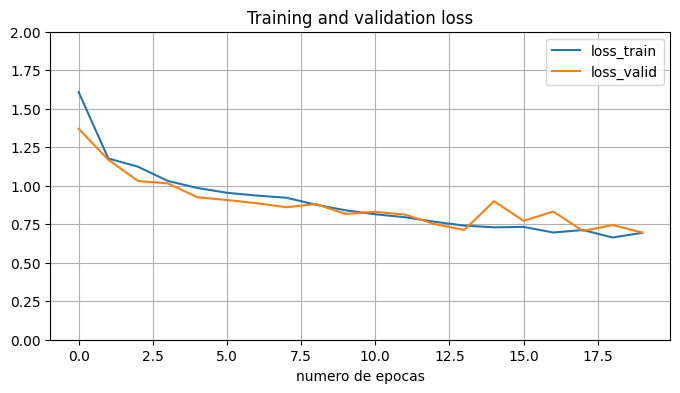

In [ ]:
pd.DataFrame({'loss_train': history2.history['loss'],
              'loss_valid': history2.history['val_loss']}).plot(figsize=(8,4))

plt.grid(True)
plt.ylim(0,2)
plt.xlabel('numero de epocas')
plt.title('Training and validation loss');

En esta primera gráfica ya podemos observar un modelo que no tiene tanto sobreajuste y que tiene unos valores de loss similares para entrenamiento y validación.

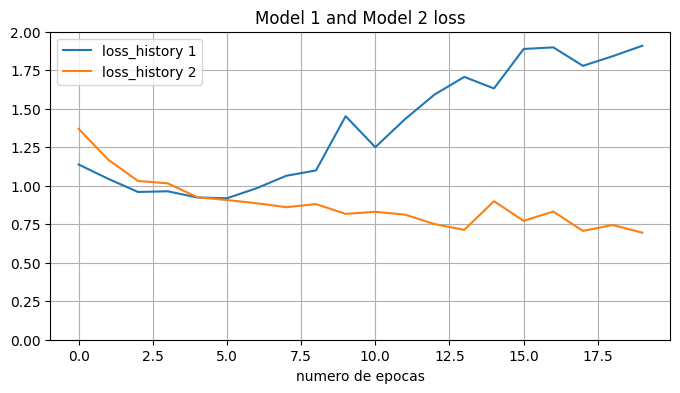

In [ ]:
pd.DataFrame({'loss_history 1': history.history['val_loss'],
              'loss_history 2': history2.history['val_loss']}).plot(figsize=(8,4))

plt.grid(True)
plt.ylim(0,2)
plt.xlabel('numero de epocas')
plt.title('Model 1 and Model 2 loss');

Si este loss lo comparamos con el modelo anterior vemos que mejora bastante, ya que la tendencia del modelo anterior apunta a que el loss se dispare mientras que en el nuevo vemos que la tendencia es de bajada.

# c) Modelo 3: Transfer Learning (objetivo: accuracy_valid > 88%)

En nuestro problema de clasificación de flores, el utilizar CNNs diseñadas y entrenadas por nosotros mismos, aparece una barrera en las proximidades del 75-80% de precisión del modelo (siempre sobre validación).

Para superar este escollo, el siguiente paso natural es la utilización de modelos preentrenados. Existe una gran variedad de ellos basados en redes CNNs clásicas, donde la principal diferencia es que acumulan más capas que nuestros modelos 1 y 2. Adicionalmente, en estos modelos se han ido incorporando diferentes propuestas para mejorar la arquitectura de la CNN.

En general, utilizando estos modelos convolucionales preentrenados podemos alcanzar accuracies próximos al 90%. Normalmente, estos modelos han sido previamente entrenados sobre datasets de gran tamaño y con gran número de categorías. P.e. en subconjuntos de Imagenet (14 millones de imagenes de 22K categorías).

Dado que estos modelos se entrenaron para resolver un problema "relativamente" parecido a nuestro problema de clasificación, parece razonable pensar que podemos aprovechar ese conocimiento capturado en la red para resolver nuestro problema de clasificación de flores.

Se pide que implemente y entrene un modelo utilizando una de estas redes pre-entrenadas (__con el objetivo de alcanzar un accuracy (sobre el conjunto de validación > 88%__). Los pasos que debe seguir son:

1.   Importa el modelo desde Tensorflow.
2.   Dado que este modelo ha sido entrenado para clasificar entre 1.000 categorías, las capas densas finales del modelo no son útiles para nuestro problema de clasificación de 5 categorías (es lo que suele llamarse include_top = SI/NO). De manera que eliminamos lo que a veces se suele llamar el "top model". De este modo sólo nos quedamos con la parte que hace la funcionalidad de "procesamiento" de la imagen.
3.   Añadimos una capa de flatten y tres nuevas capas densas especificas para nuestro problema con dimensiones 4096, 1072 y la que necesite la capa de salida (con sus correspondientes drop-out).
4.   Después haremos el denominado `Fine-Tuning` del modelo. Para ello le indicaremos a Tensorflow que únicamente debe entrenar:
   * Las dos últimas capas convolucinoales de la red preentrenada
   * Las tres capas densas que hemos incluido nuevas.

  De esta forma, quedan congeladas (no se entrenan los pesos) todas las capas convolucionales de la red preentrenada, excepto las dos últimas. Para estados dos últimas capas convolucionales, usando como punto de partida los del pre-trained model obtendremos un ajuste fino de sus pesos. Por supuesto, tensorflow entrenará no solo estas dos ultimas capas convolucionales, sino también las tres capas densas que hemos añadido.

5. Dado que estamos reutilizando un modelo que no "es nuestro", deberemos ceñirnos al tamaño de imagen que permite la red a la entrada.

Para elegir el modelo preentrenado que debe utilizar cada grupo, proceda del siguiente modo:
* Paso 1: sume los DNIs de los componentes del grupo (si el grupo tiene un sólo miembro, vaya directamente al paso 2). res = dni_1 + dn_2
* Paso 2: Aplique la siguiente operación al resultado anterior: res mod 6.
* Paso 3: Tome el modelo cuyo número asociado coincide con el resultado de la operación anterior.
* Paso 4: El porcentaje que aparece entre paréntesis junto al nombre del modelo es el accuracy (en validación) que deberías poder alcanzar sin dificultad utilizando el modelo. En todos los casos considera un input_shape = (224, 224, 3).

  0. Resnet50 (>90%)
  https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet50/ResNet50

  1. Resnet101 (>90%) input_shape = (224, 224, 3)
  https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet/ResNet101

  2. VGG16 (>90%) input_shape = (224, 224, 3)
  https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/VGG16

  3. VGG19 (>90%) input_shape = (224, 224, 3) https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg19/VGG19

  4. Xception (>88%) input_shape = (224, 224, 3) https://www.tensorflow.org/api_docs/python/tf/keras/applications/xception/Xception

  5. Inceptionv3 (>88%) input_shape = (224, 224, 3) https://www.tensorflow.org/api_docs/python/tf/keras/applications/inception_v3/InceptionV3

P.e. si los DNIs de los alumnos son: 12345678 y 23456781. La suma es 35802467. De donde 35802467 mod 6 = 5. Por tanto, tomaríamos el modelo Inceptionv3.

Con DNI 44248492 me ha tocado la red VGG16.

In [ ]:
#Comenzamos importando el modelo.

from keras.applications import VGG16

vgg_model = VGG16(weights= 'imagenet', include_top= False, input_shape= (224,224,3))

58889256/58889256 [==============================] - 1s 0us/step


In [ ]:
#A continuación procedemos con el Fine-Tuning
for layer in vgg_model.layers[:16]:
  layer.trainable = False

for i,layer in enumerate(vgg_model.layers):
  print(i, layer.name, layer.trainable)

0 input_1 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 False
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True


In [ ]:
#A continuación procedemos a completar la red con la capa de Flatten y las capas densas anteriormente descritas:

x = vgg_model.output
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(units = 4096, activation = 'relu')(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(units = 1072, activation = 'relu')(x)
x = keras.layers.Dropout(0.5)(x)
output = keras.layers.Dense(units = 5, activation = 'softmax')(x)

model3 = keras.Model(vgg_model.input, output)

In [ ]:
model3.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     



6.   Una vez definido el modelo tenemos que crear los data_generators asociados. Para ello:
> * Utiliza Data augmentation.
> * Las imágenes tienen que ser preprocesadas igual que cuando se entrenó el modelo VGG original. Para ello se utiliza el parámetro `preprocessing_function=preprocess_input` (preprocess_input importado desde `keras.applications.vgg16` en ambos generators (train y valid). Por tanto, no hay que indicarle `rescale`. En caso de ser necesario, se encargará `preprocess_input`.
> * Recuerda que el tamaño de imagen debe ser: 224x224.




In [ ]:
from keras.applications.vgg16 import preprocess_input
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224,224),
                                                    batch_size=100,
                                                    class_mode='sparse')
validation_generator = val_datagen.flow_from_directory(val_dir,
                                                    target_size=(224,224),
                                                    batch_size=100,
                                                    class_mode='sparse')

Found 2935 images belonging to 5 classes.
Found 735 images belonging to 5 classes.



7.   A la hora de entrenar un modelo pretrained es típico bajar el learning rate respecto al que utilizaríamos para un modelo nuestro desde cero.

In [ ]:
optim = keras.optimizers.Adam(learning_rate=0.0001)

model3.compile(loss='sparse_categorical_crossentropy',
              optimizer=optim,
              metrics=['acc'])

In [ ]:
history3 = model3.fit(train_generator, epochs=15, validation_data=validation_generator)

Epoch 1/15
30/30 [==============================] - 79s 2s/step - loss: 4.8599 - acc: 0.4882 - val_loss: 0.9125 - val_acc: 0.6844
Epoch 2/15
30/30 [==============================] - 58s 2s/step - loss: 1.0008 - acc: 0.6589 - val_loss: 0.6268 - val_acc: 0.8068
Epoch 3/15
30/30 [==============================] - 53s 2s/step - loss: 0.7371 - acc: 0.7462 - val_loss: 0.5709 - val_acc: 0.8435
Epoch 4/15
30/30 [==============================] - 51s 2s/step - loss: 0.5861 - acc: 0.7980 - val_loss: 0.5281 - val_acc: 0.8639
Epoch 5/15
30/30 [==============================] - 54s 2s/step - loss: 0.5215 - acc: 0.8235 - val_loss: 0.4949 - val_acc: 0.8707
Epoch 6/15
30/30 [==============================] - 61s 2s/step - loss: 0.4763 - acc: 0.8416 - val_loss: 0.4923 - val_acc: 0.8680
Epoch 7/15
30/30 [==============================] - 51s 2s/step - loss: 0.3923 - acc: 0.8624 - val_loss: 0.4518 - val_acc: 0.8830
Epoch 8/15
30/30 [==============================] - 54s 2s/step - loss: 0.3620 - acc: 0.86

Investiga cómo es la estructura del modelo preentrenado que has utilizado. Descríbelo

El modelo utilizado ha sido el modelo VGG16, este modelo sigue la arquitectura VGG, la cual tiene 2 variantes una con 16 capas(la empleada) y otra con 19. Este modelo sentó un precedente en los patrones de diseño de las CNNs, caracterizado en el uso de Kernels pequeños, de 3x3, en sus capas convolucionales con Padding y Stride = 1, encargándose así de reducir el tamaño de las imagenes únicamente las capas de MaxPooling, generalmente (2,2). Como característica principal también podemos destacar que el número de filtros va incrementando con razón 2 a lo largo de cada bloque.

Esta red en concreto, la VGG16, cuenta con 5 bloques convolucionales.

![picture](https://datascientest.com/es/wp-content/uploads/sites/7/2021/04/illu_VGG-02.png)

Como podemos observar, los dos primeros bloques vienen marcados por 2 capas convolucionales seguidas de una de pooling, mientras que en los 3 últimos tenemos 3 capas convolucionales seguidas de una de pooling.

Esta es una red profunda al contar con 16 capas convolucionales, lo cuál permite aprender representaciones de características complejas, a su vez, y gracia a los filtros pequeños y repetidos, es capaz de capturar características más locales y complejas. Por último su arquitectura simple y uniforme facilita su comprensión e implementación.


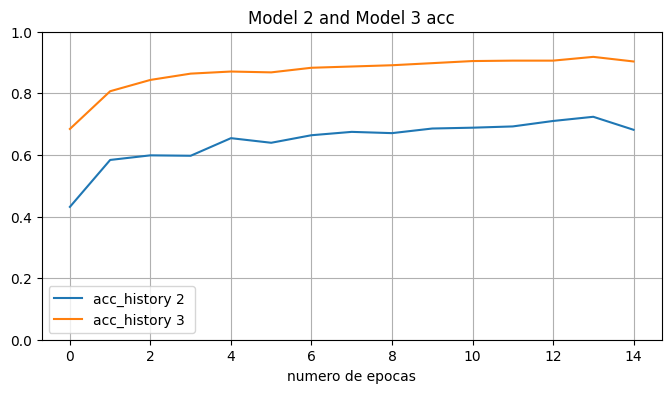

In [ ]:
pd.DataFrame({'acc_history 2 ': history2.history['val_acc'][:15],
              'acc_history 3': history3.history['val_acc']}).plot(figsize=(8,4))

plt.grid(True)
plt.ylim(0,1)
plt.xlabel('numero de epocas')
plt.title('Model 2 and Model 3 acc');

Como conclusión final con esta pequeña gráfica queda claro que el rendimiento usando transfer learning es mucho mejor que el rendimiento en modelos anteriores.